In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import mglearn
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC 

plt.rcParams['font.family']='AppleGothic'
plt.rcParams['axes.unicode_minus']=False

# 결정트리 (Decision tree)

- 분류와 회귀에 널리 사용하는 모델
- 예/ 아니오 질문을 이어나가며 학습 

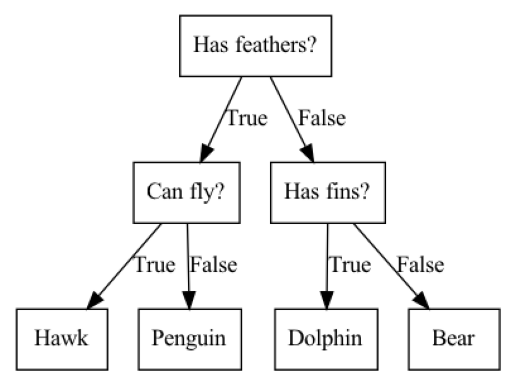

In [3]:
mglearn.plots.plot_animal_tree()

- 노드 : 질문이나 정답을 담은 네모 상자
- 마지막 노드는 리프 (leaf) 라고도 함. 
- 에지 (edge) 는 질문의 답과 다음 질문을 연결한다.  

- 결정트리를 학습한다
    - 정답에 가장 빨리 도달하는 예/ 아니오 질문 목록을 학습한다. ==> 테스트 
    - 알고리즘은 가능한 모든 테스트에서 타깃 값에 대해 가장 많은 정보를 가진 것을 고른다.
- 루트 노드 (root node) : 맨 위 노드
- 데이터를 분할하는 것은 각 분할된 영역이 (결정 트리의 리프) 한 개의 타깃 값 (하나의 클래스나 하나의 회귀 분석 결과) 을 가질 때까지 반복된다.  
- 순수 노드 (pure node) : 타깃 하나로만 이뤄진 리프 노드

- 모든 리프가 순수 노드가 될 때까지 진행하면 모델이 매우 복잡해지고 훈련 데이터에 과대적합된다.  => 결정 경계가 클래스의 포인트들에서 멀리 떨어진 이상치에 너무 민감해진다.  
    - 트리 생성을 일찍 중단하거나 (사전 가지치기, pre-pruning)
    - 데이터 포인트가 적은 노드를 삭제하거나 (사후 가지치기, post-pruning) 병합한다. (가지치기 pruning)
        - 사전가지치기는 트리의 최대 깊이나 리프의 최대 갯수를 제한하거나, 노드가 분할하기 위한 포인트의 최소 개수를 지정한다.
- scikit-learn 에서 결정 트리는 Des=cisionTreeRegressor 와 DecisionTreeClassifier 에 구현되어 있다. 
- scikit-learn 은 사전 가지치기만 지원한다. 

In [4]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train,y_train)
print("훈련 세트 정확도 : {:.2f}".format(tree.score(X_train,y_train)))
print("테스트 세트 정확도 : {:.2f}".format(tree.score(X_test,y_test)))

훈련 세트 정확도 : 1.00
테스트 세트 정확도 : 0.94


- 모든 리프 노트가 순수 노드이므로 훈련 세트의 정확도는 100 % 
- 트리의 성장을 제한하려면 max_depth = 제한을 주면 됨

In [5]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train,y_train)

print("훈련 세트 정확도 : {:.3f}".format(tree.score(X_train,y_train)))
print("테스트 세트 정확도 : {:.3f}".format(tree.score(X_test,y_test)))

훈련 세트 정확도 : 0.988
테스트 세트 정확도 : 0.951


결정 트리 분석  
- 트리 모듈의 export_graphviz 함수를 이용해 트리를 시각화할 수 있음.
- 그래프 저장용 텍스트 파일 포맷인 .dot 파일을 만든다. 

In [ ]:
from sklearn.tree import export_graphviz 
export_graphviz(tree,out_file="tree.dot",class_names=["악성","양성"],
                feature_names=cancer.feature_names,impurity=False, filled=True)

## tmp 로 이미지 저장됨

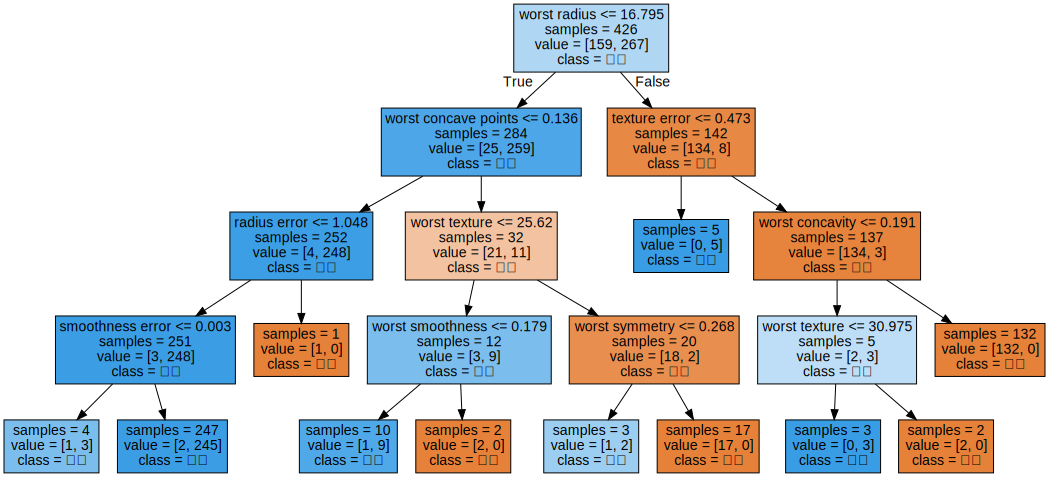

In [8]:
import graphviz

with open("tree.dot") as f :
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

- 트리가 더 깊어지면 (10 정도의 깊이는 보통) 한눈에 보기가 힘들어짐.  
- 트리를 조사할 때는 많은 수의 데이터가 흐르는 경로를 찾아보면 좋음.  

- 트리가 어떻게 작동하는지 요약하는 속성  
- 특성 중요도 (feature importance) : 트리를 만드는 결정에 각 특성이 얼마나 중요한지를 평가하는 것. 0~1. $\sum$ 특성중요도 = 1

In [10]:
print("특성 중요오 : \n",tree.feature_importances_)

특성 중요오 : 
 [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


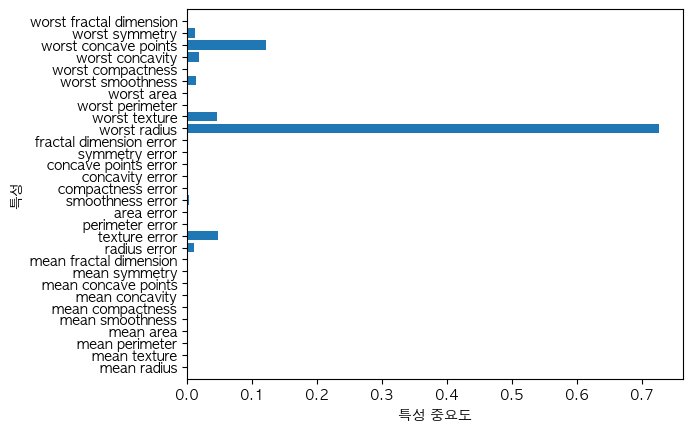

In [12]:
# 선형 모델의 계수를 시각화하는 것과 비슷한 방법으로 특성 중요도를 시각화할 수 있음
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(np.arange(n_features),model.feature_importances_,align='center')
    plt.yticks(np.arange(n_features),cancer.feature_names)
    plt.xlabel("특성 중요도")
    plt.ylabel("특성")
    plt.ylim(-1,n_features)

plot_feature_importances_cancer(tree)

- 어떤 특성의 feature_importance_ 값이 낮다고 유용하지 않다는 뜻은 아니고, 단지 트리가 그 특성을 선택하지 않았다는 것. (다른 특성이 동일한 정보를 지니고 있어서 그럴 수 있음)
- 특성 중요도는 항상 양수이며 특성이 어떤 클래스를 지지하는지 알 수 없음. 즉, 특성 중요도의 값은 "worst radius" 가 중요하다고 알려주지만 높은 반지름이 양성을 의미하는지 악성을 의미하는지 알 순 없음. 

Feature importances: [0. 1.]


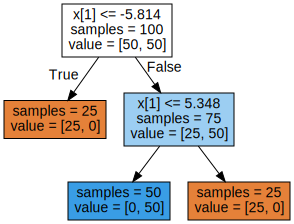

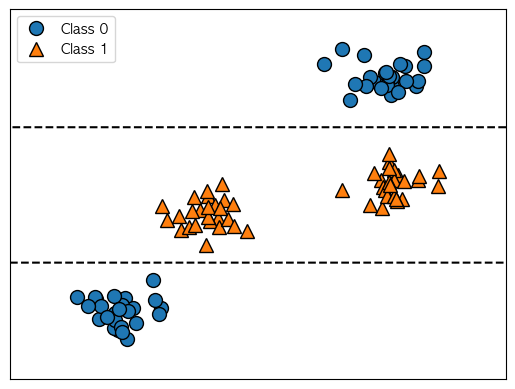

In [13]:
mglearn.plots.plot_tree_not_monotone()

- 두 개의 특성과 두 개의 클래스를 가진 데이터셋을 보여줌. 

- DecisionTreeRegressor 로 구현된 회귀 결정 트리
    - 사용법과 분석은 분류 트리와 매우 비슷함
    - 외샵 (extrapolation), 즉 훈련 데이터의 범위 밖의 포인트에 대해 예측을 할 수 없다.

Text(0, 0.5, '가격 ($/Mbyte)')

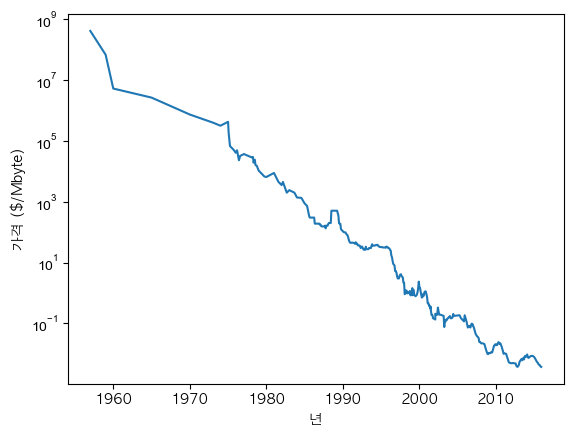

In [19]:
import os
ram_prices = pd.read_csv("https://raw.githubusercontent.com/rickiepark/intro_ml_with_python_2nd_revised/refs/heads/main/data/ram_price.csv")
plt.yticks(fontname='Arial')
plt.semilogy(ram_prices.date,ram_prices.price)
plt.xlabel("년")
plt.ylabel("가격 ($/Mbyte)")

Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.


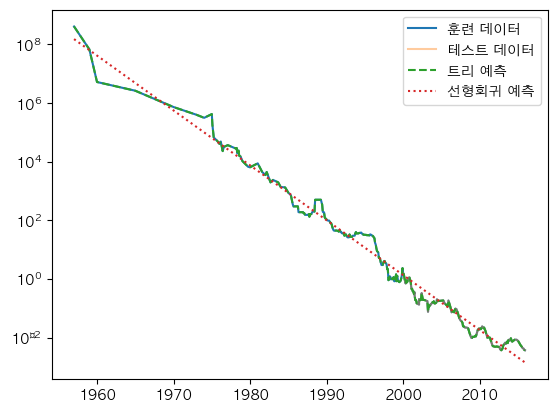

In [28]:
from sklearn.linear_model import LinearRegression
# 날짜 특성 하나만으로 2000 년 전가지의 데이터로부터 2000년 후의 가격을 예측  
from sklearn.tree import DecisionTreeRegressor
# 2000 년 이전을 훈련 데이터로, 2000년 이후를 테스트 데이터로 만든다.
data_train = ram_prices[ram_prices.date < 20000]
data_test = ram_prices[ram_prices.date >= 2000]

# 가격 예측을 위해 날짜 특성만을 이용한다.
X_train = data_train.date.to_numpy()[:, np.newaxis]
# 데이터와 타깃 사이의 관계를 간단하게 만들기 위해 로그 스케일로 바꾼다.
y_train = np.log(data_train.price)
tree = DecisionTreeRegressor().fit(X_train,y_train)
linear_reg = LinearRegression().fit(X_train,y_train)

# 예측은 전체 기간에 대해서 수행한다
X_all = ram_prices.date.to_numpy()[:,np.newaxis]

pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

# 예측한 값의 로그 스케일을 되돌린다
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

plt.semilogy(data_train.date, data_train.price, label="훈련 데이터",linestyle='-')
plt.semilogy(data_test.date, data_test.price,label="테스트 데이터",linestyle='-',alpha=0.4)
plt.semilogy(ram_prices.date,price_tree,label="트리 예측",linestyle='--')
plt.semilogy(ram_prices.date,price_lr,label="선형회귀 예측",linestyle=':')
plt.legend()
plt.show()

# train, test data 따로 다시 그려보기

- 사전 가지치기
     - max_depth, max_leaf_nodes, min_samples_leaf 등 사용 
- 결정 트리가 다른 알고리즘보다 나은 점
    - 만들어진 모델을 쉽게 시각화 할 수 있어 비전문가도 이해하기 쉽다 (비교적 작은 트리일 때)
    - 데이터의 스케일에 구애받지 않는다
    - 데이터를 분할하는데 데이터 스케일의 영향을 받지 않으므로 결정 트리에서는 특성의 정규화나 표준화 같은 전처리 과정이 필요 없다.
    - 특성의 스케일이 서로 다르거나 이진 특성과 연속적인 특성이 혼합되어 있을 때도 잘 작동
- 단점
    - 사전 가지치기를 사용함에도 불구하고 과대적합 되는 경향이 있음
    - 일반화 성능이 좋지 않음
    

In [29]:
# 데이터 프레임을 사용해 DecisionTreeRegressor 를 훈련하고 입력된 특성 개수와 데이터 프레임의 열 이름을 추출
tree.fit(data_train[['date']],y_train)

print("특성 개수 : ",tree.n_features_in_)
print("특성 이름 : ",tree.feature_names_in_)



특성 개수 :  1
특성 이름 :  ['date']


- 앙상블 : 여러 머신러닝 모델을 연결하여 더 강력한 모델을 만드는 기법
    - 랜덤 포레스트 (random forest), 그레디언트 부스팅 (gradient boosting) 등

# 랜덤 포레스트

- 여러 결정 트리의 묶음
- 서로 다른 방향으로 과대적합된 트리를 많이 만들면 그 결과를 평균냄으로써 과대적합된 양을 줄일 수 있다
- 결정 트리를 많이 만들어야하고, 각각의 트리는 타깃 예측을 잘 해야 하고 다른 트리와는 구별되어야 한다.
- 트리들이 달라지도록 트리 생성 시 무작위성을 주입한다.
- 트리 만드는 방법
    - 데이터 포인트를 무작위로 선택
    - 분할 테스트에서 특성을 무작위로 선택

- 랜덤 포레스트 구축
    - 생성할 트리의 개수를 정해야한다.
        - RandomForestRegressor 나 RandomForestClassifier 의 n_estimators 매개변수
    - 트리 10개가 필요하고, 완전히 독립적으로 만들어지도록 각 트리가 무작위한 선택을 하게 한다. ==> Boostrap sample 생성 (n_samples 개의 데이터 포인트 중에서 무작위로 데이터를 n_samples 횟수만큼 반복  추출)
- 만든 데이터셋으로 결정 트리를 만듦
    - 노트에서 전체 특성을 대상으로 최선의 테스트를 찾는 것이 아니고, 알고리즘이 각 노드에서 후보 특성을 무작위로 선택한 후 이 후보들 중에서 최선의 테스트를 찾는다. 
    - 몇 개의 특성을 고를지는 max_features 매개변수로 조절 가능함
- 부트스트랩 샘플링은 랜덤 포레스트의 트리가 조금씩 다른 데이터셋을 이용해 만들어지도록한다. 
- 각 노드에서 특성의 일부만 사용하기 때문에 트리의 각 분기는 각기 다른 특성 부분 집합을 사용한다. 

- 핵심 매개변수 ==> max_features
    - max_features 를 n_features 로 설정하면 트리의 각 분기에서 모든 특성을 고려하므로 특성 선택에 무작위성이 들어가지 않는다. (그러나 부트스트랩 샘플링으로 인한 무작위성은 그대로)
    - max_features = 1 로 설정하면 트리의 분기는 테스트할 특성을 고를 필요가 없게 되며 그냥 무작위로 선택한 특성의 임계값을 찾기만 하면 된다. 
    - 결국 max_features 를 
        - 크게 ==> 트리들은 매우 비슷해지고 가장 두드러진 특성을 이용해 데이터에 잘 맞춤
        - 작게 ==> 랜덤 포레스트 트리들이 많이 달라지고 각 트리는 데이터데 맞추기 위해 깊이가 깊어지게 된다. 


랜덤 포레스트 분석


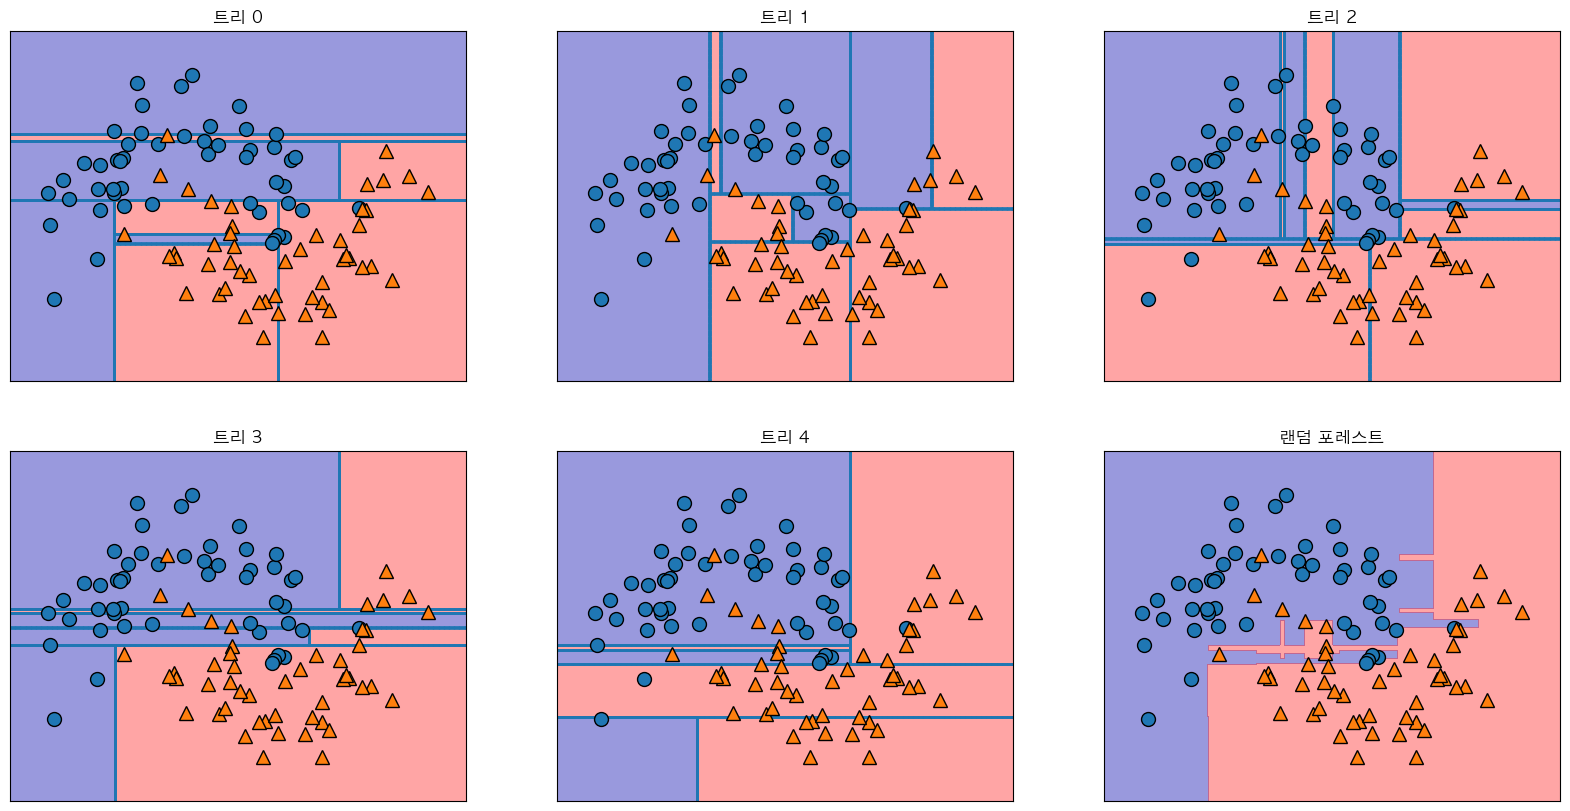

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

X,y = make_moons(n_samples=100,noise=0.25,random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, random_state=42)

forest = RandomForestClassifier(n_estimators=5,random_state=2)
forest.fit(X_train,y_train)

fig,axes = plt.subplots(2,3,figsize=(20,10))
for i, (ax,tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("트리 {}".format(i))
    mglearn.plots.plot_tree_partition(X,y,tree,ax=ax)

mglearn.plots.plot_2d_separator(forest, X, fill=True, ax=axes[-1,-1],alpha=0.4)
axes[-1,-1].set_title("랜덤 포레스트")
mglearn.discrete_scatter(X[:,0],X[:,1],y)

- 다섯 개의 트리가 만든 결정 경계가 확연히 다름 
- 부트스트랩 샘플링 때문에 한쪽 트리에 나타나는 훈련 포인트가 다른 트리에는 포함되지 않을 수 있어 각 트리는 불완전하다

- 랜덤 포레스트는 개개의 트리보다는 덜 과대적합되고 훨씬 좋은 경계를 만든다.

In [32]:
# 유방암 데이터셋에 100개의 트리로 이뤄진 랜덤 포레스트
X_train,X_test, y_train,y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

forest = RandomForestClassifier(n_estimators=100,random_state=0)
forest.fit(X_train,y_train)

print("훈련 세트 정확도 : {:.3f}".format(forest.score(X_train,y_train)))
print("테스트 세트 정확도 : {:.3f}".format(forest.score(X_test,y_test))) 

훈련 세트 정확도 : 1.000
테스트 세트 정확도 : 0.972


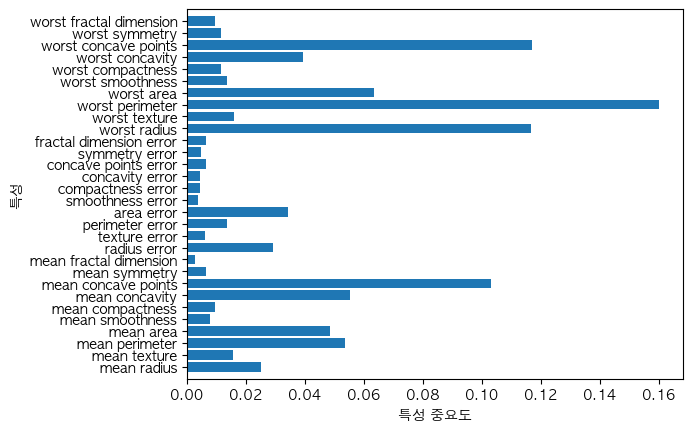

In [34]:
plot_feature_importances_cancer(forest)

- 랜덤 포레스트에서는 단일 트리의 경우보다 훨씬 많은 특성이 0 이상의 중요도 값을 갖는다

장단점과 매개변수  
- 회귀와 분류에 있어 Random forest 는 가장 많이 사용되는 ML Algorithm.
- 장점
    - 의사결정 과정을 간소하게 표현해야 한다면 단일 트리를 사용할 수 있다. 
    - 매우 큰 데이터셋에도 잘 작동하며 CPU 코어로 간단히 병렬화 할 수 있다. 
- 단점
    - 비전문가에게 예측 과정을 시작적으로 보여주려면 하나의 결정트리가 더 좋다 
    - 대량의 데이터셋에서 랜덤 포레스트 모델을 만들 때 다소 시간이 걸린다. ==> 병렬화
    - 차원이 높고 희소한 데이터에는 잘 작동하지 않는다 ==> 선형 모델 사용
    - 선형모델보다 많은 메모리를 사용하며 훈련과 예측이 느리다. 

** 랜덤하므로 다른 random_state 를 지정하면 전혀 다른 모델이 만들어진다.  
** 트리가 많을수록 random_state 값의 변화에 따른 변동이 적다  
- 중요 매개변수는 n_estimators, max_features 이고 max_depth 같은 사전 가지치기 옵션이 있다. 
     - n_estimators 는 클수록 좋다 .


# 그레이디언트 부스팅 회귀 트리

- 여러 개의 결정 트리를 묶어 강력한 모델을 만드는 또 다른 앙상블 방법
- 회귀와 분류에 모두 사용할 수 있다. 
- 이전 트리의 오차를 보완하는 방식응로 순차적으로 트리를 만든다. 
- 무작위성이 없으나 강력한 사전 가진치기가 사용된다. 
- 하나에서 다섯 정도의 깊지 않은 트리를 사용하므로 메모리를 적게 사용하고 예측도 빠르다==> 약한 학습기 (weak learner) 를 여러개 연결하는 아이디어  
- 랜덤 포레스트보다는 매개변수 설정에 조금 더 민감하지만 잘 조정하면 더 높은 정확도를 제공해준다. 


In [35]:
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state = 0)
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

print("훈련 세트 정확도 : {:.3f}".format(gbrt.score(X_train,y_train)))
print("테스트 세트 정확도 : {:.3f}".format(gbrt.score(X_test, y_test)))

훈련 세트 정확도 : 1.000
테스트 세트 정확도 : 0.965


In [36]:
# 과대적합 되었으므로 트리의 최대 깊이 줄이기 
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train,y_train)

print("훈련 세트 정확도 : {:.3f}".format(gbrt.score(X_train,y_train)))
print("테스트 세트 정확도 : {:.3f}".format(gbrt.score(X_test, y_test)))

훈련 세트 정확도 : 0.991
테스트 세트 정확도 : 0.972


In [37]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train,y_train)

print("훈련 세트 정확도 : {:.3f}".format(gbrt.score(X_train,y_train)))
print("테스트 세트 정확도 : {:.3f}".format(gbrt.score(X_test, y_test)))

훈련 세트 정확도 : 0.988
테스트 세트 정확도 : 0.958


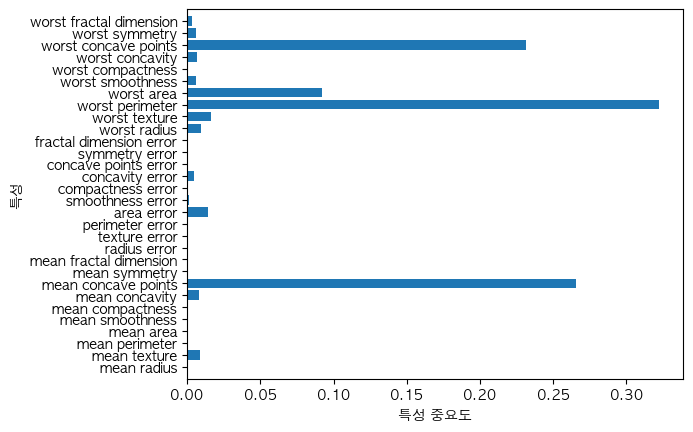

In [38]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train,y_train)

plot_feature_importances_cancer(gbrt)

- 랜덤 포레스트가 잘 작동하더라도 예측 시간ㄴ이 중요하거나 머신러닝 모델에서 마지막 성능까지 쥐어짜야 할 때 그레이디언트 부스팅을 사용하면 도움이 된다.  
- 대규모 ML 문제에 그레이디언트 부스팅을 적용하려면 xgboost 패키지와 파이썬 인터페이스를 검토해보는 것이 좋다.  

- 장점 
    - 특성의 스케일을 조정하지 않아도 됨
    - 이진 특성이나 연속적인 특성에서도 잘 작동한다
- 단점
    - 매개변수를 잘 조정해야 함
    - 훈련 시간이 길다 
    - 트리 기반 모델의 특성상 희소한 고차원 데이터에는 잘 작동하지 않는다
- 특성
    - 중요 매개변수 : n_estimators, learning_rate 
    - learning_rate 를 낮추면 비슷한 복잡도의 모델을 만들기 위해 더 많은 트리를 추가해야 한다.
    - n_estimators 를 크게 하면 모델이 복잡해지고 과대적합될 수 있다.  

# 다른 앙상블

In [42]:
# 노트북이 코랩에서 실행 중인지 체크합니다.
import os
import sys
if 'google.colab' in sys.modules:
    if not os.path.isdir('mglearn'):
        # mglearn을 다운받고 압축을 풉니다.
        !wget -q -O mglearn.tar.gz https://bit.ly/mglearn-tar-gz
        !tar -xzf mglearn.tar.gz

In [ ]:
import sklearn
#from preamble import *
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
from sklearn.datasets import load_breast_cancer

Xm type : <class 'numpy.ndarray'>, ym type : <class 'numpy.ndarray'>
Xm
 [[ 1.87756309  0.56839425]
 [ 0.36877983 -0.34894509]
 [ 0.96515318  0.10921819]
 [ 0.48599685  0.20291313]]
ym
 [1 1 0 1]
Xm length : 100, ym length : 100


Text(0, 0.5, 'Feature 2')

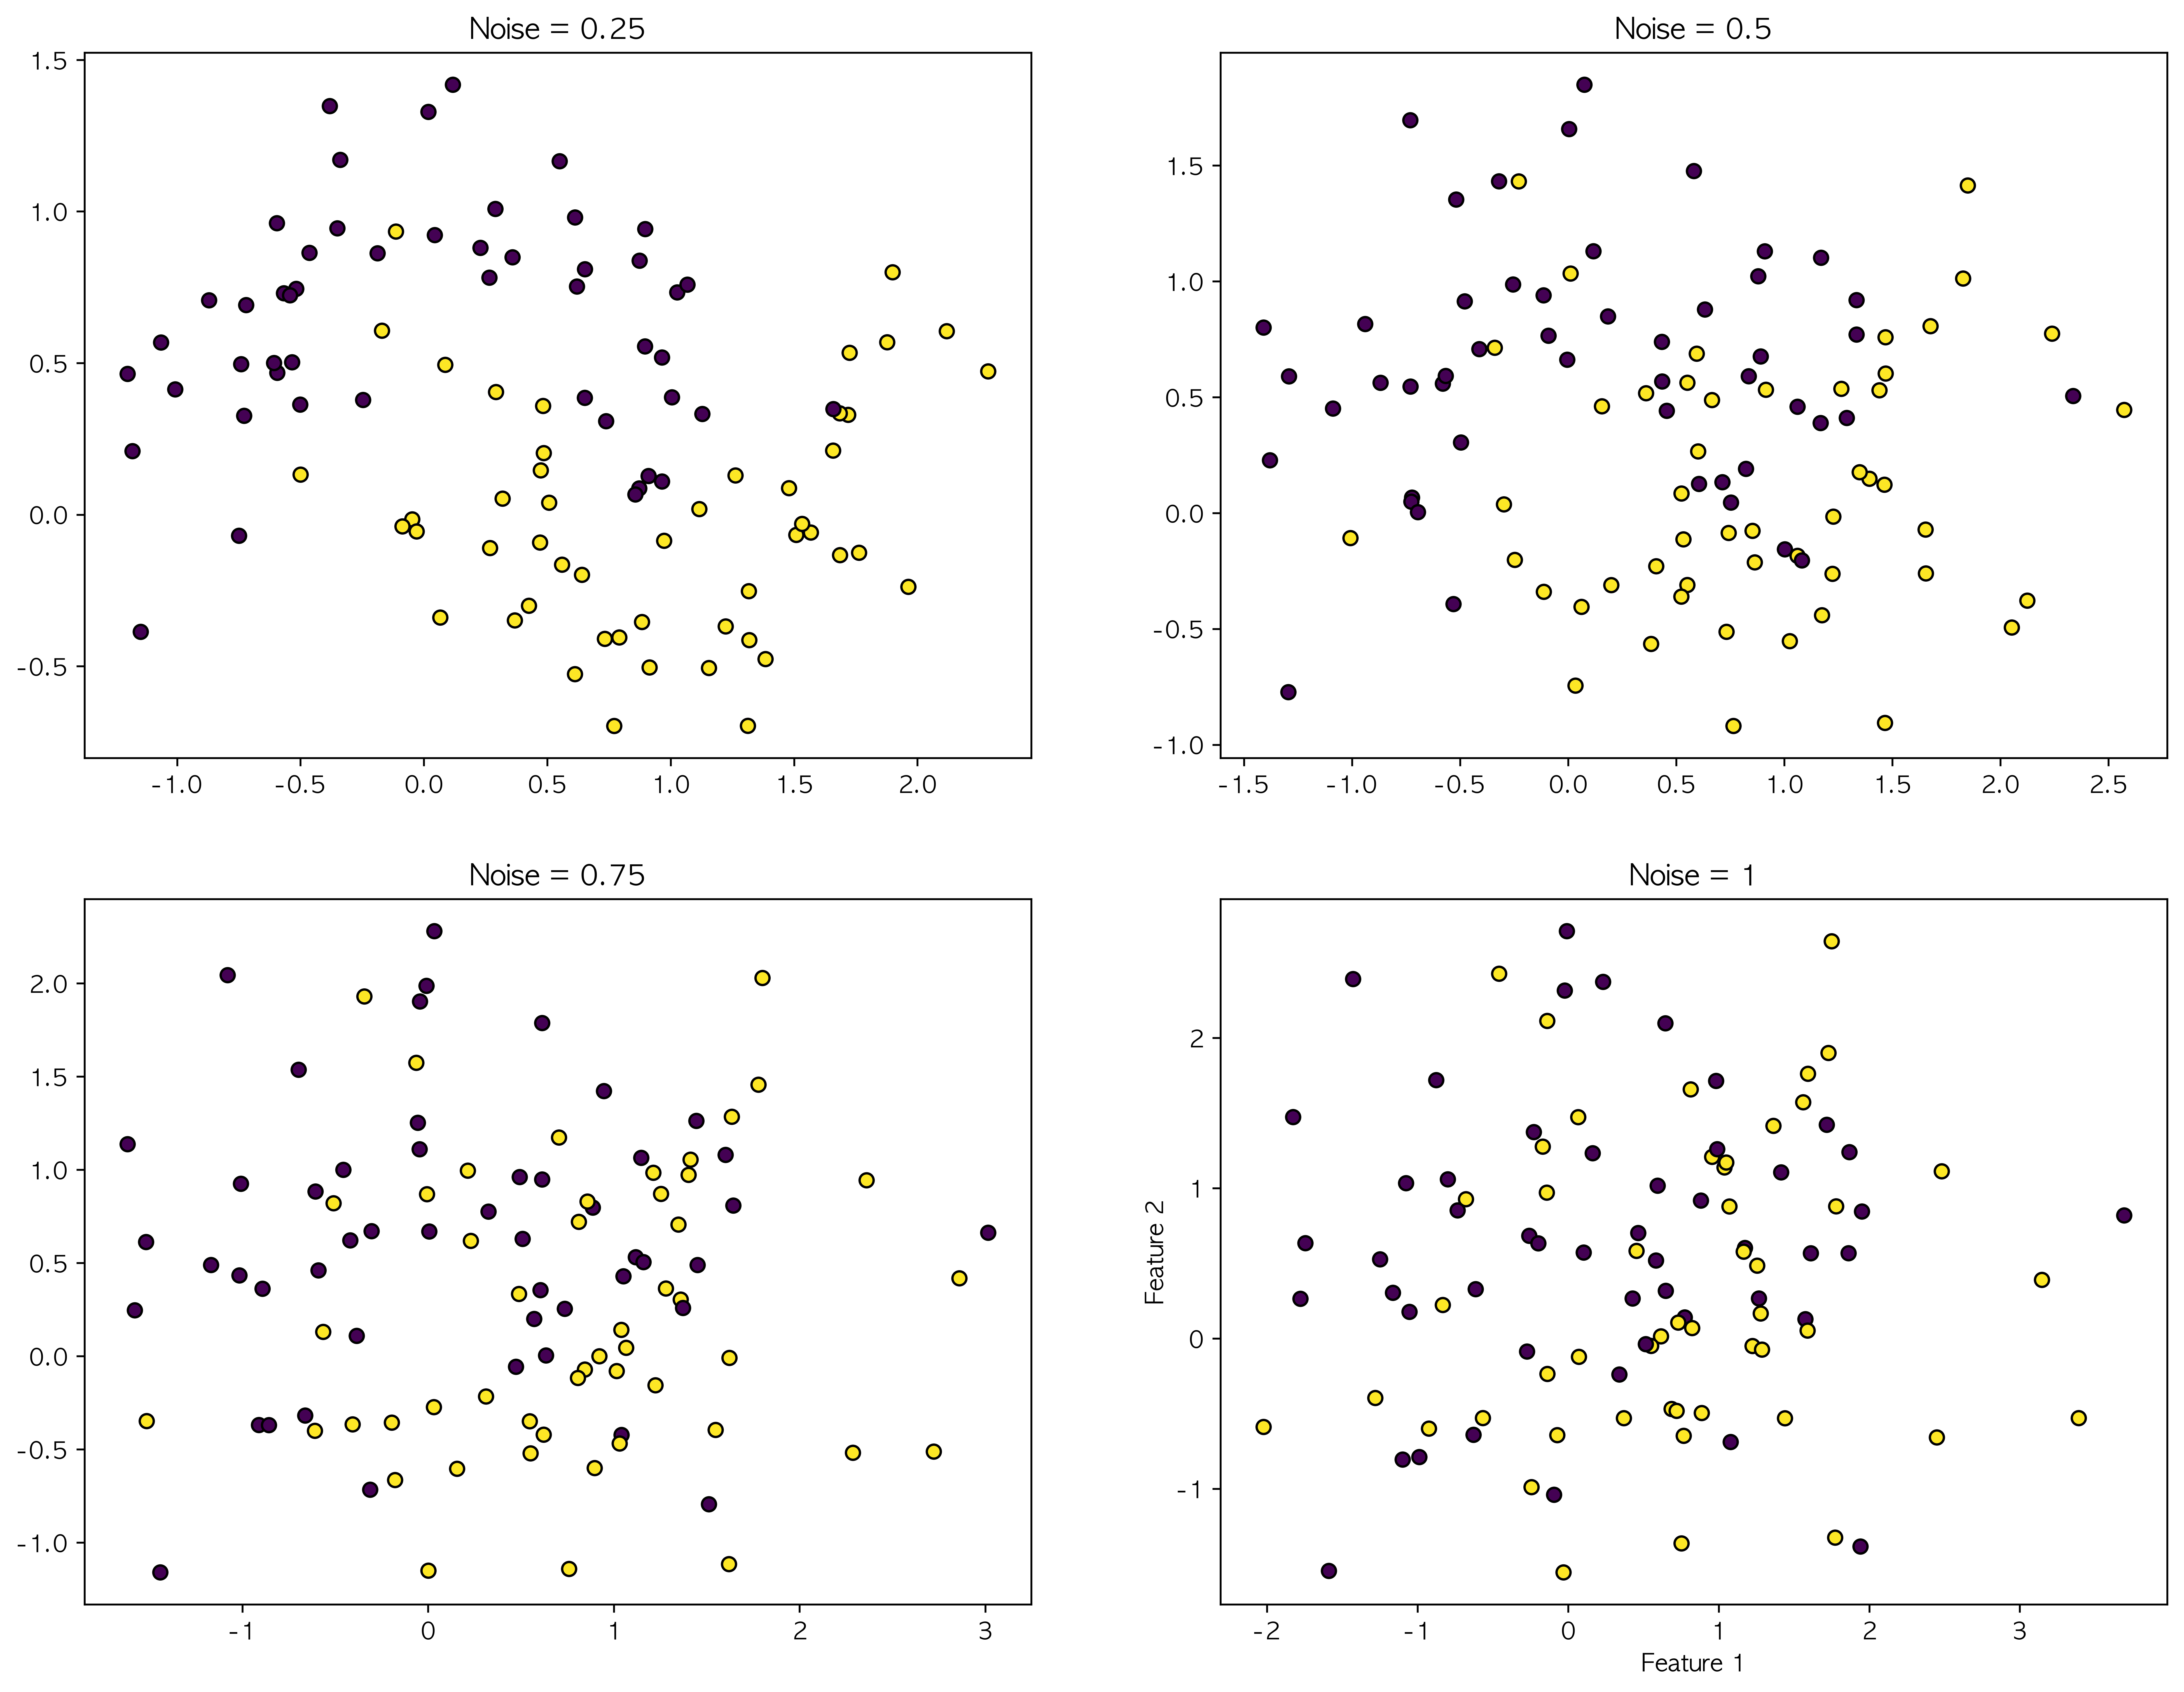

In [62]:
Xm, ym = make_moons(n_samples=100,noise=0.25,random_state=3)
Xm2, ym2 = make_moons(n_samples=100,noise=0.5,random_state=3)
Xm3, ym3 = make_moons(n_samples=100, noise=0.75, random_state=3)
Xm4, ym4 = make_moons(n_samples=100,noise=1,random_state=3)
print("Xm type : {}, ym type : {}".format(type(Xm),type(ym)))
print("Xm\n",Xm[0:4])
print("ym\n",ym[0:4])
print("Xm length : {}, ym length : {}".format(len(Xm),len(ym)))

plt.figure(figsize=(16,12),dpi=600)
plt.subplot(2,2,1)
plt.scatter(Xm[:,0],Xm[:,1],c=ym, cmap='viridis',edgecolors='k')
plt.title("Noise = 0.25")
plt.subplot(2,2,2)
plt.scatter(Xm2[:,0],Xm2[:,1],c=ym2, cmap='viridis',edgecolors='k')
plt.title("Noise = 0.5")
plt.subplot(2,2,3)
plt.scatter(Xm3[:,0],Xm3[:,1],c=ym3, cmap='viridis',edgecolors='k')
plt.title("Noise = 0.75")
plt.subplot(2,2,4)
plt.scatter(Xm4[:,0],Xm4[:,1],c=ym4, cmap='viridis',edgecolors='k')
plt.title("Noise = 1")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

In [ ]:
Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=3)
Xm_train, Xm_test, ym_train, ym_test = train_test_split(
    Xm, ym, stratify=ym, random_state=42)

cancer = load_breast_cancer()
Xc_train, Xc_test, yc_train, yc_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

## Bagging

- Bootstrap aggregating 의 줄림말
- 중복을 허용한 랜덤 샘플링으로 만든 훈련 세트를 사용하여 분류기를 각기 다르게 학습시킴.

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier

bagging = BaggingClassifier(LogisticRegression(solver='liblinear'),n_estimators=100,
                            oob_score=True, n_jobs=-1, random_state=42)
bagging.fit(Xc_train, yc_train)

print("훈련 세트 정확도 : {:.3f}".format(bagging.score(Xc_train,yc_train)))
print("테스트 세트 정확도 : {:.3f}".format(bagging.score(Xc_test,yc_test)))
print("00B 샘플의 정확도 : {:.3f}".format(bagging.oob_score_))

훈련 세트 정확도 : 0.962
테스트 세트 정확도 : 0.958
00B 샘플의 정확도 : 0.948


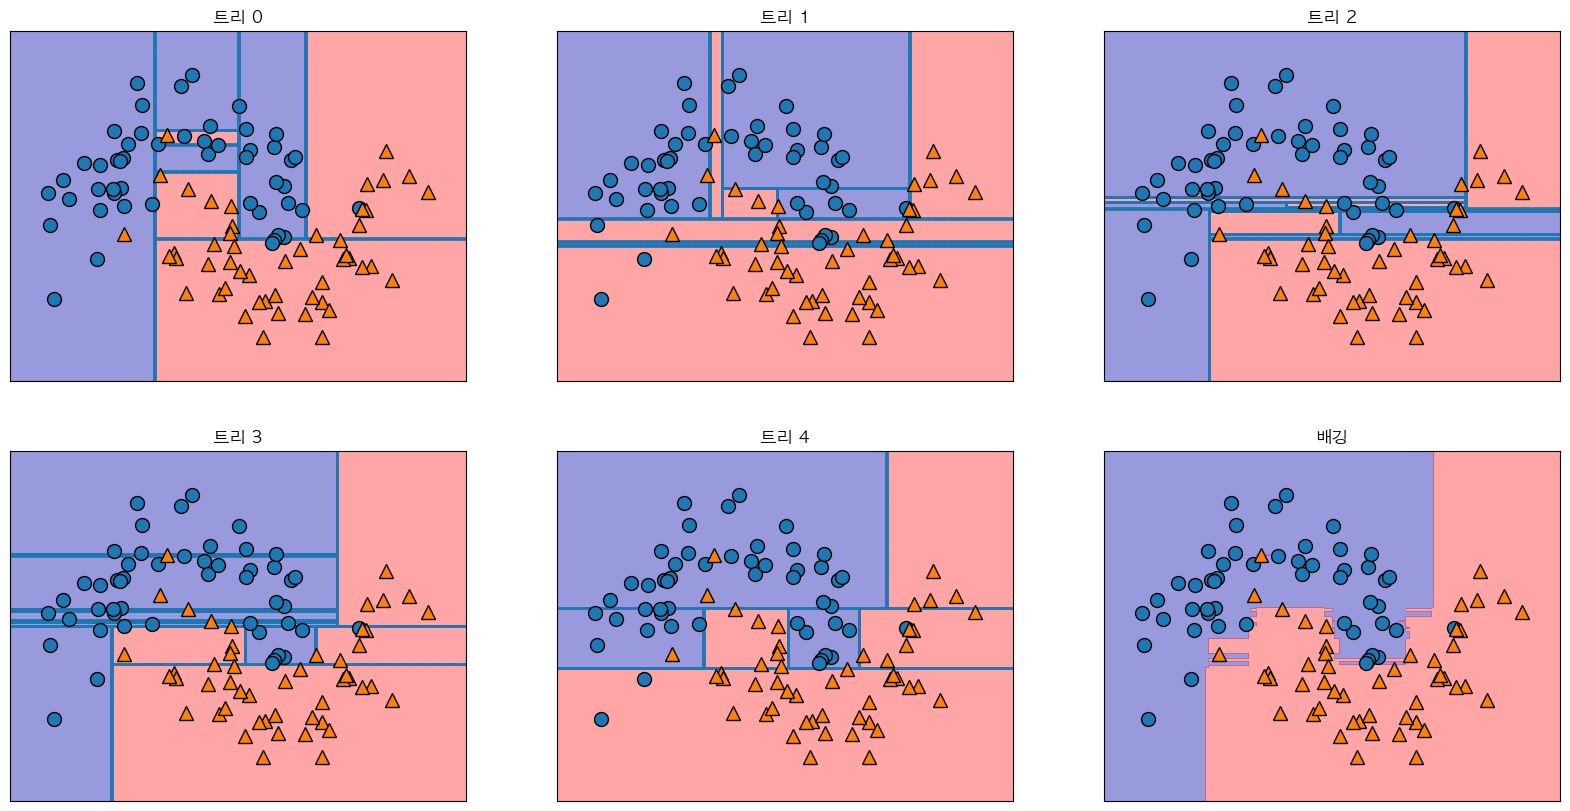

In [ ]:
from sklearn.tree import DecisionTreeClassifier
bagging = BaggingClassifier(DecisionTreeClassifier(), n_estimators=5, n_jobs=-1, random_state=42)
bagging.fit(Xm_train,ym_train)

fig,axes = plt.subplots(2,3,figsize=(20,10),dpi=600)
for i, (ax, tree) in enumerate(zip(axes.ravel(), bagging.estimators_)):
    ax.set_title("트리 {}".format(i))
    mglearn.plots.plot_tree_partition(Xm, ym, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(bagging,Xm, fill=True, ax=axes[-1,-1],alpha=0.4)
axes[-1,-1].set_title("배깅")
mglearn.discrete_scatter(Xm[:,0],Xm[:,1],ym)
plt.show()

In [66]:
bagging = BaggingClassifier(DecisionTreeClassifier(), n_estimators=100, oob_score=True, n_jobs=-1,random_state=42)
bagging.fit(Xc_train,yc_train)

print("훈련 세트 정확도 : {:.3f}".format(bagging.score(Xc_train,yc_train)))
print("테스트 세트 정확도 : {:.3f}".format(bagging.score(Xc_test,yc_test)))
print("00B 샘플의 정확도 : {:.3f}".format(bagging.oob_score_))



훈련 세트 정확도 : 1.000
테스트 세트 정확도 : 0.965
00B 샘플의 정확도 : 0.948


- 배깅은 max_sample 매개변수에서 부트스트랩 샘플의 크기를 지정할 수 있음 (기본값 1.0)
- bootstrap 매개변수 (기본값 True) False 로 지정하면 중복을 허용하지 않는 샘플링을 수행함. 
- max_features 매개변수에서 각 분류기 훈련에 사용할 특성 개수를 지정함. 
- 랜덤 포레스트는 DecisionTreeClassifier (splitter='best') 를 사용하도록 고정되어 있음. 결정 트리를 splitter='random' 으로 설정하면 무작위로 분할한 후보 노드 중에서 최선의 분할을 찾음

## Extra-Trees

- 랜덤포레스트와 비슷하지만 후보 특성을 무작위로 분할한 다음 최적의 분할을 찾음
- 랜덤 포레스트와 달리 DecisionTreeClassifier (Splitter='random') 을 사용하고 부트스트랩 샘플링은 기본적으로 적용하지 않음. (bootstrap=True 하면 적용 가능)
- 무작위성을 증가시키면 일반적으로 모델의 편향이 늘어나지만 분산이 감소 
- 랜덤포레스트와 거의 같은 성능이나 계산 비용이 비교적 적음
- 그러나 무작위 분할 때문에 일반화 성능을 높이려면 종종 많은 트리를 만들어야함 ==> 랜덤포레스트 더 선호

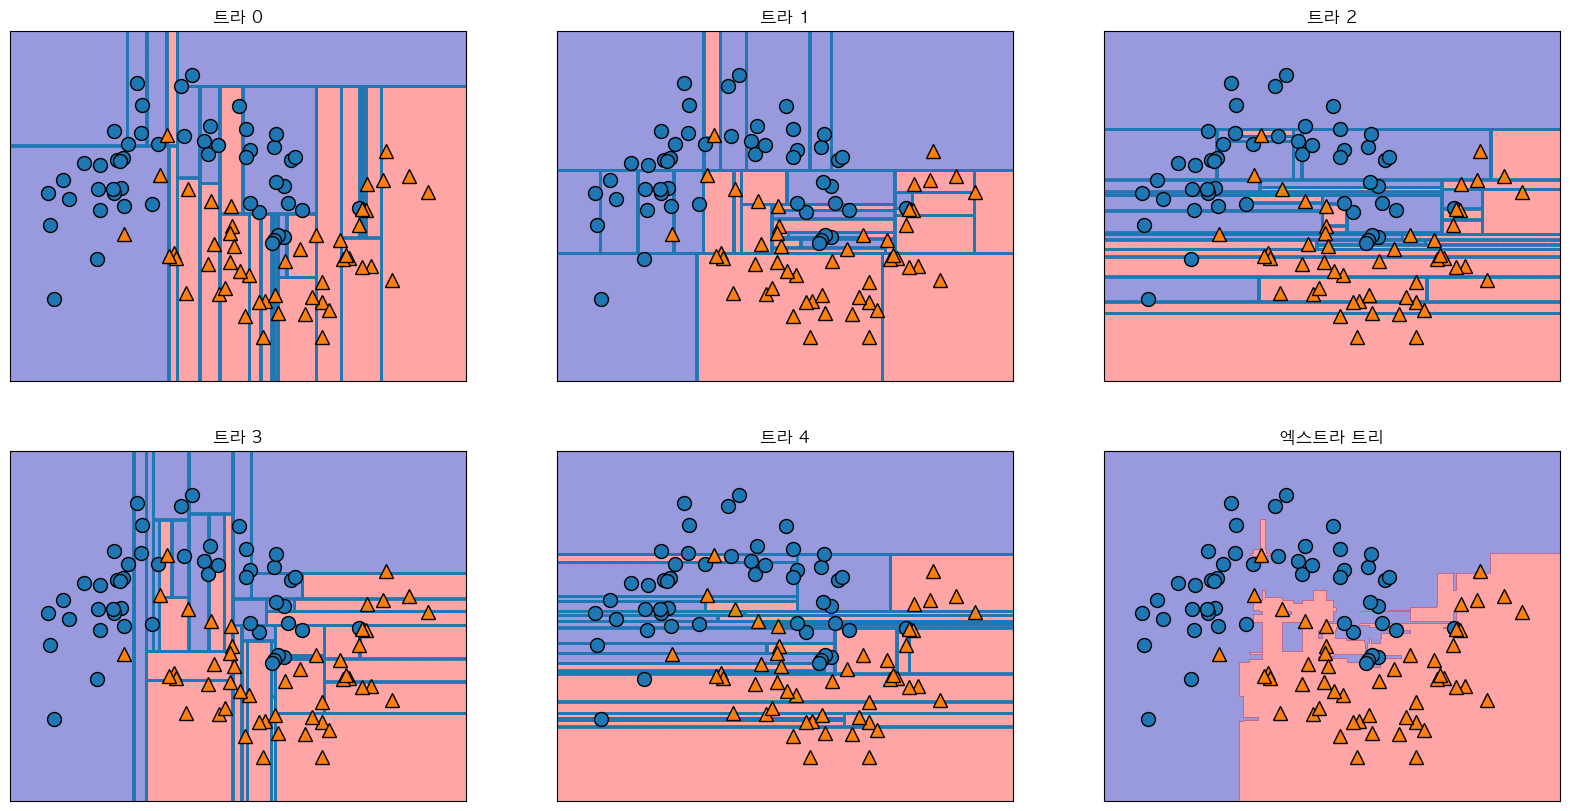

In [68]:
from sklearn.ensemble import ExtraTreesClassifier
xtree= ExtraTreesClassifier(n_estimators=5, n_jobs=-1, random_state=0)
xtree.fit(Xm_train,ym_train)

fig, axes = plt.subplots(2,3,figsize=(20,10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), xtree.estimators_)):
    ax.set_title("트라 {}".format(i))
    mglearn.plots.plot_tree_partition(Xm,ym,tree,ax=ax)

mglearn.plots.plot_2d_separator(xtree, Xm, fill=True, ax=axes[-1,-1],alpha=0.4)
axes[-1,-1].set_title("엑스트라 트리")
mglearn.discrete_scatter(Xm[:,0],Xm[:,1],ym)
plt.show()

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 2 with shape (2,) and arg 3 with shape (30,).

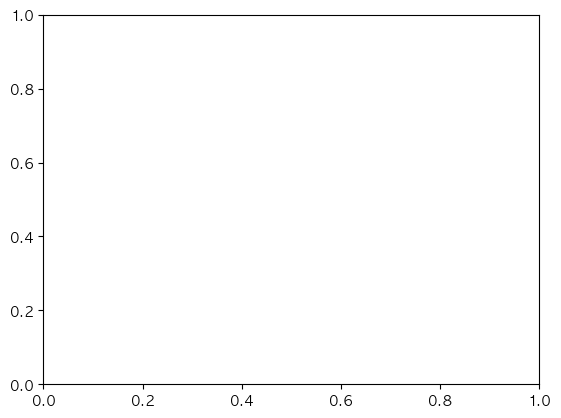

In [72]:
n_features = cancer.data.shape[1]
plt.barh(range(n_features), xtree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), cancer.feature_names)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.ylim(-1, n_features)
plt.show()

## AdaBoost

- Adaptive Boosting 의 줄임말
- 그레이디언트 부스팅처럼 약한 학습기를 사용함. 
- 이전의 모델이 잘못 분류한 샘플에 가중치를 높여서 다음 모델을 훈련시킴. 
- 훈련된 각 모델은 성능에 따라 가중치가 부여됨
- 예측을 만들 때는 모델이 예측한 레이블을 기준으로 모델의 가중치를 합산하여 가장 높은 값을 가진 레이블을 선택함.
- Scikit-learn 의 AdaBoostClassifier
    - DecisionTreeClassifier(max_depth=1) 사용이 기본
    - Regressor 는 depth=3 사용
    - base_estimator 매개변수에서 다른 모델을 지정할 수 있음
    - n_jobs 매개변수 지원 X (순차적으로 학습해야하므로)

In [73]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=5, random_state=42)
ada.fit(Xm_train, ym_test)

fig, axes = plt.subplots(2,3,figsize=(20,10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), ada.estimators_)):
    ax.set_title("트리 {}".format(i))
    mglearn.plots.plot_tree_partition(Xm,ym,tree,ax=ax)
    
mglearn.plots.plot_2d_separator(ada, Xm, fill=True, ax=axes[-1,-1],alpha=0.4)
axes[-1,-1].set_title("에이다 부스트")
mglearn.discrete_scatter(Xm[:,0],Xm[:,1],ym)
plt.show()

ValueError: Found input variables with inconsistent numbers of samples: [75, 25]